In [1]:
import ROOT
from root_numpy import root2array, tree2array
import pandas as pd
import matplotlib.pyplot as plt
import os

Welcome to JupyROOT 6.22/00


In [2]:
rootfiles = os.popen('ls output/*.root').read().split('\n')[:-1]
rootfiles

['output/pMSSM_MCMC_1_0to300.root', 'output/pMSSM_MCMC_1_300to503.root']

In [3]:
df = pd.DataFrame()

for file in rootfiles:
    rfile = ROOT.TFile(file)
    intree = rfile.Get('mcmc')

    array = tree2array(intree)
    df = pd.concat([df,pd.DataFrame(array)])

/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'hb_chi2_stdout' of branch 'hb_chi2_stdout' with type 'TString' (skipping)
  cache_size)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'hs_stdout' of branch 'hs_stdout' with type 'TString' (skipping)
  cache_size)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'hb_stdout' of branch 'hb_stdout' with type 'TString' (skipping)
  cache_size)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'superiso_stdout' of branch 'superiso_stdout' with type 'TString' (sk

In [4]:
df.columns

Index(['hb_ch2', 'llh_CMS8', 'M3', 'BR_b_to_s_gamma', 'Mr1', 'Mr3', 'tb',
       'Ml3', 'Al_sign', 'Ml1', 'M1', 'mtop', 'M2', 'siso_chi2_ndf', 'Mh3',
       'hb_ch1_exclusion', 'BR_Bd_to_mu_mu', 'Delta0_B_to_K0star_gamma',
       'mhiggs', 'hs_chi2_ndf', 'hb_ch1', 'M2_sign', 'Mq1', 'Mq3', 'siso_chi2',
       'hs_chi2', 'hb_ch2_exclusion', 'Md3', 'Md1', 'accepted_index',
       'hb_ch3_exclusion', 'BR_Bs_to_mu_mu', 'Mu1', 'Mu3',
       'BR_B0_K0star_gamma', 'hb_ch4_exclusion', 'M1_sign', 'mW', 'alpha_s',
       'llh_ATLAS20', 'iteration_index', 'likelihood', 'Ab_sign', 'Ab',
       'Delta_a_mu_x1E11', 'chain_index', 'Al', 'mbottom', 'mu', 'llh_CMS13',
       'At', 'hb_ch4', 'hb_ch3', 'At_sign', 'mu_sign'],
      dtype='object')

In [5]:
df.shape

(502, 55)

/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/pandas/plotting/_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


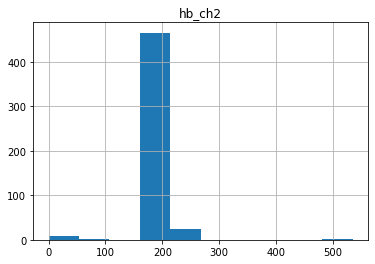

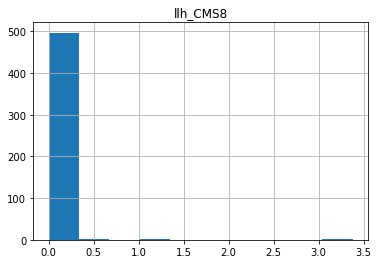

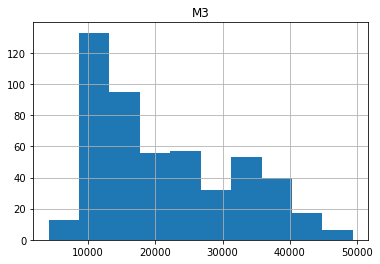

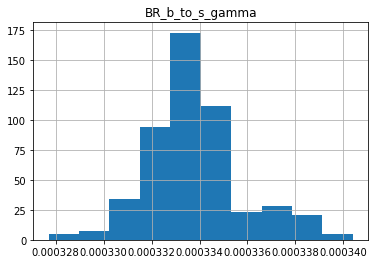

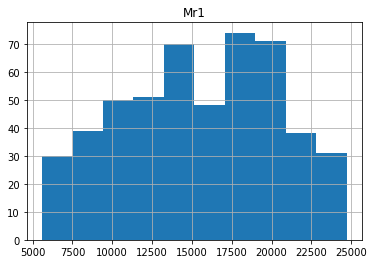

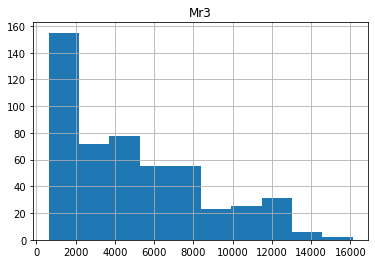

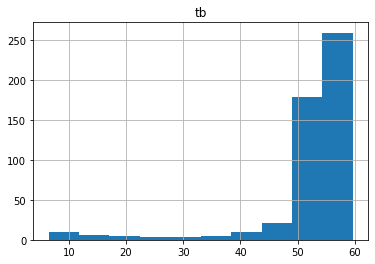

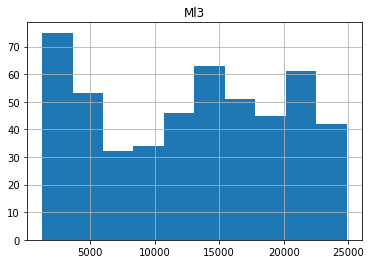

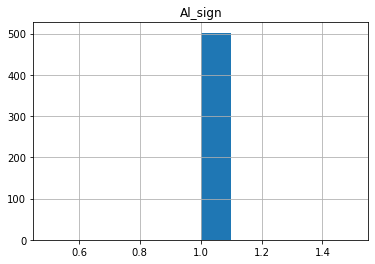

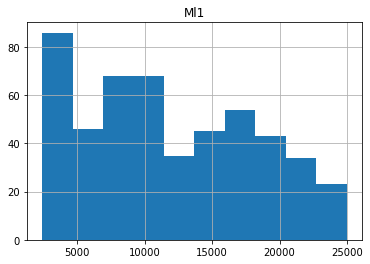

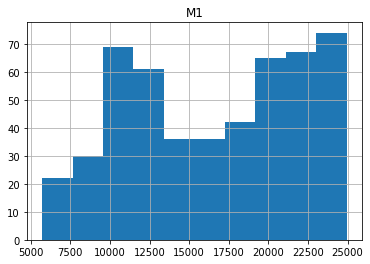

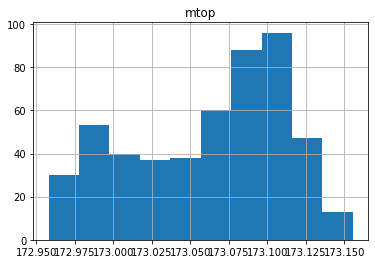

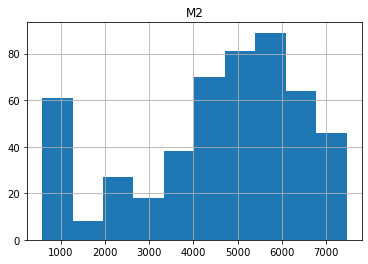

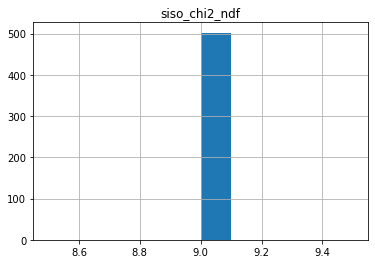

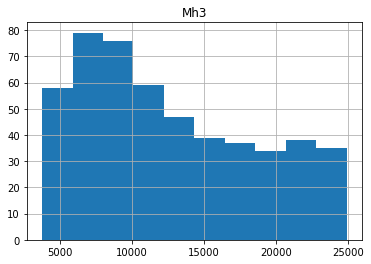

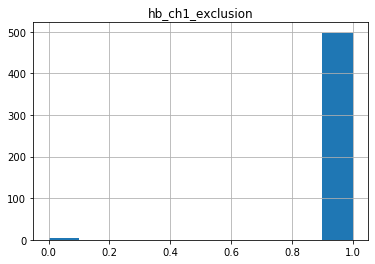

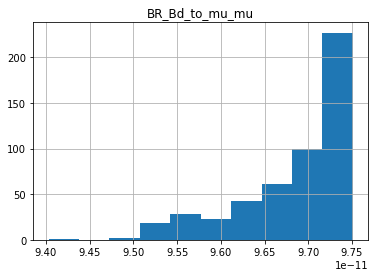

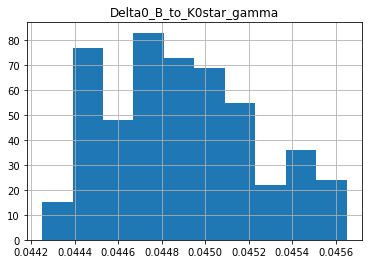

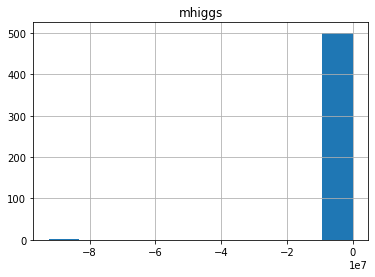

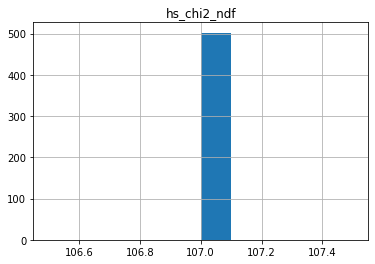

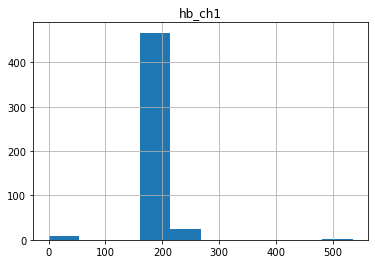

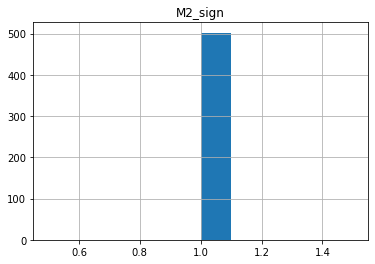

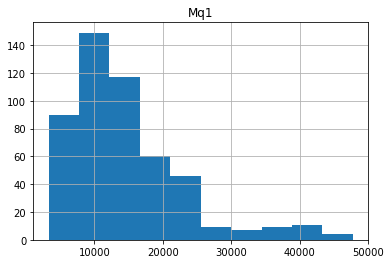

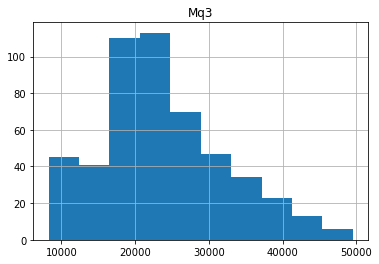

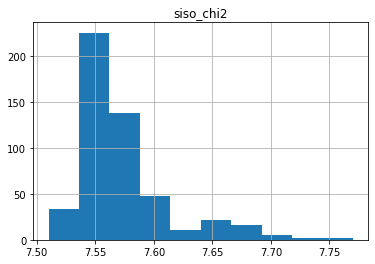

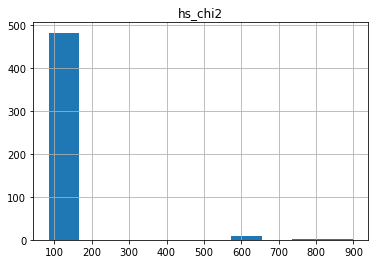

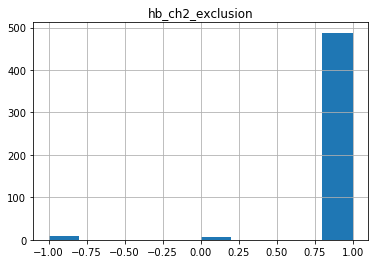

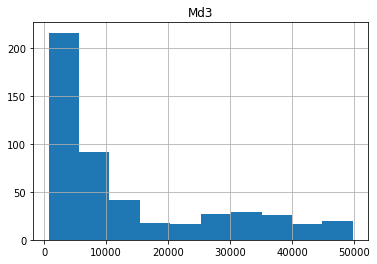

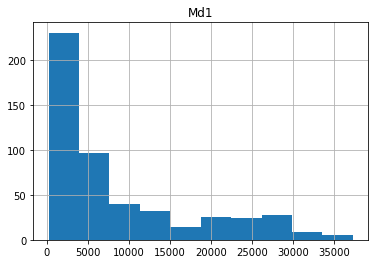

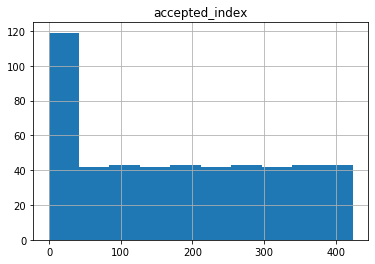

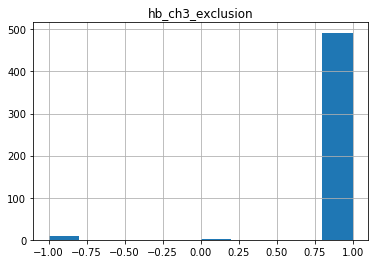

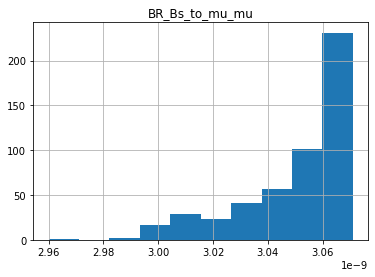

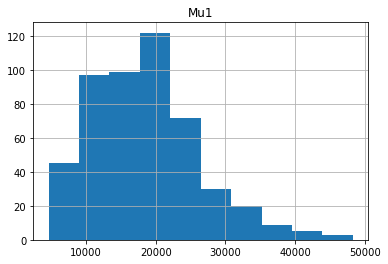

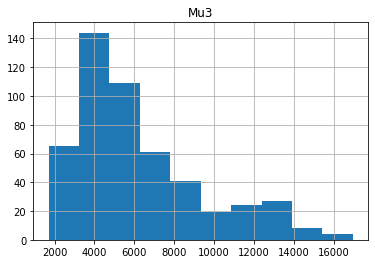

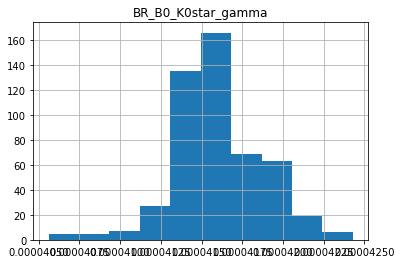

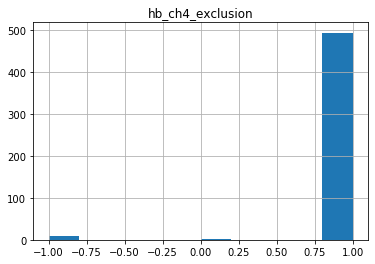

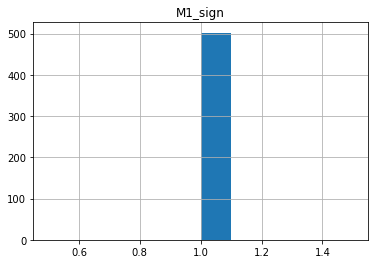

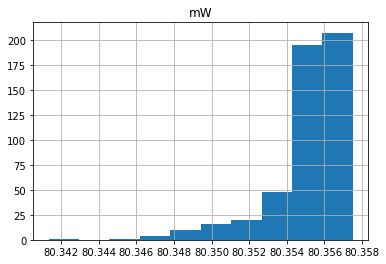

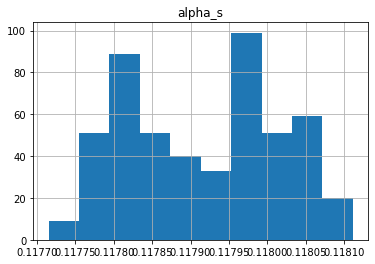

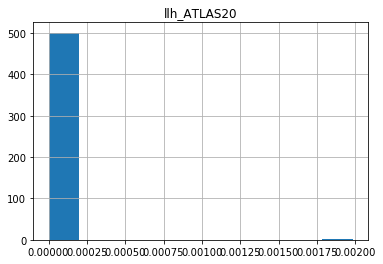

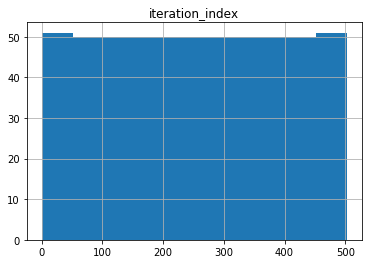

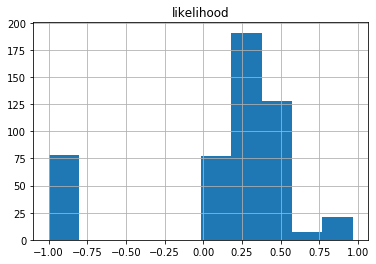

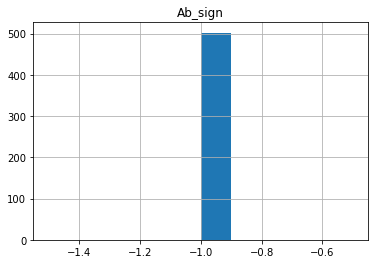

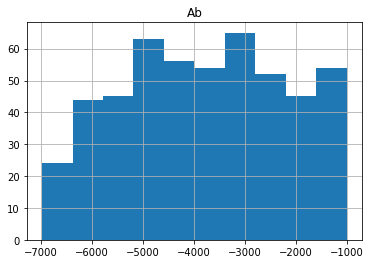

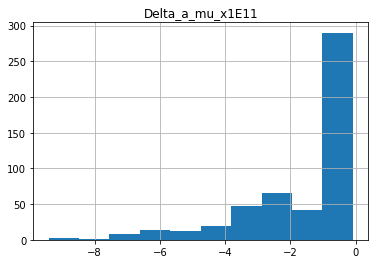

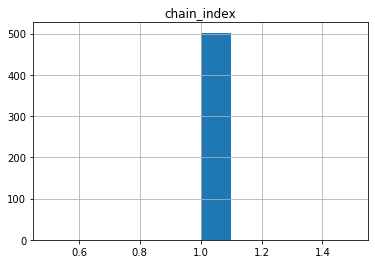

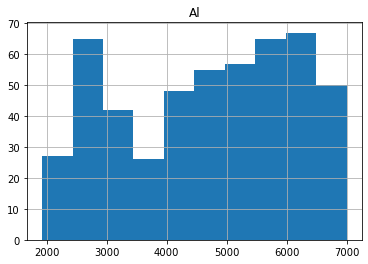

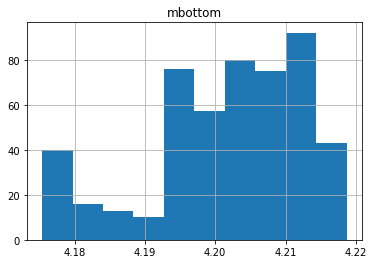

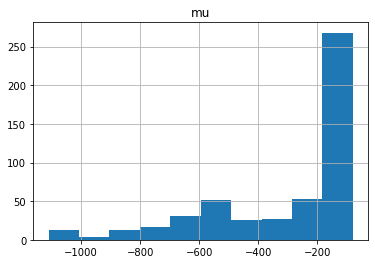

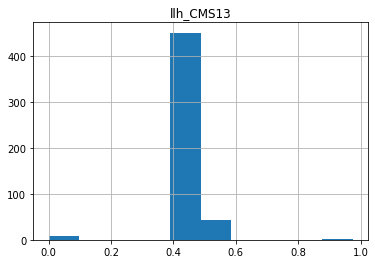

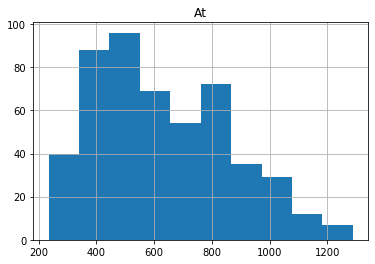

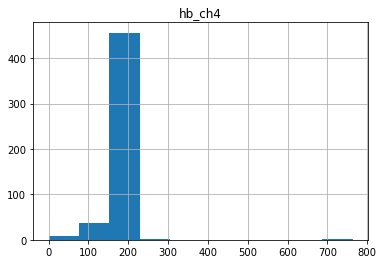

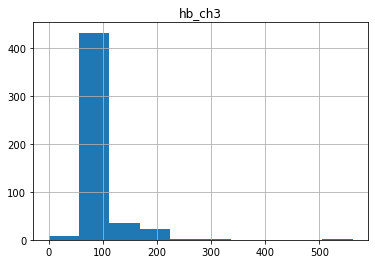

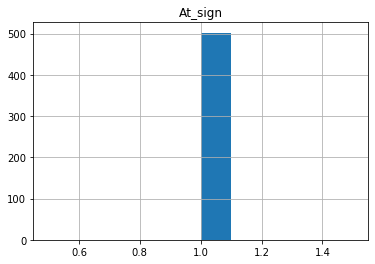

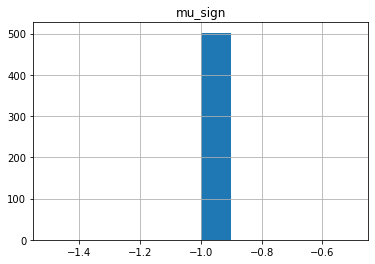

In [6]:
for v in df.columns:
    df.hist(v)

In [7]:
accepted_df = df[df['accepted_index']>=0]
failed_df = df[df['accepted_index']<0]

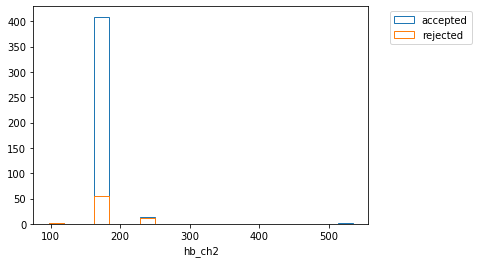

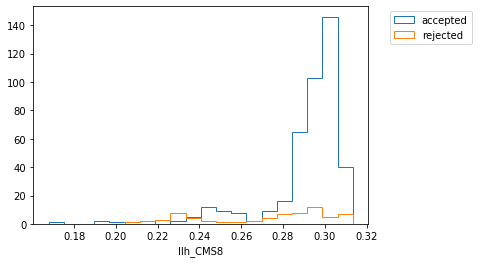

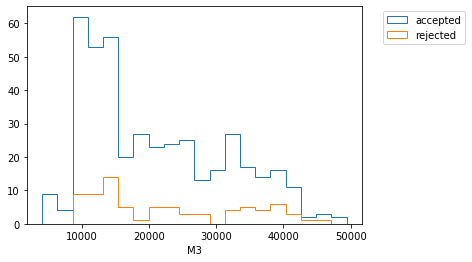

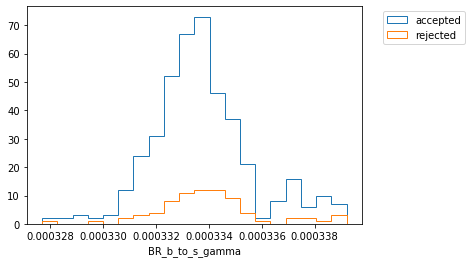

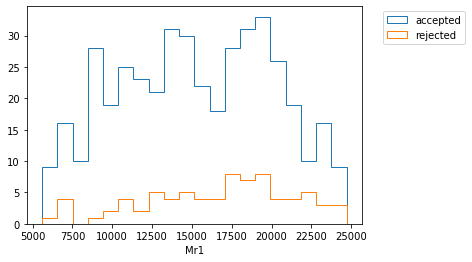

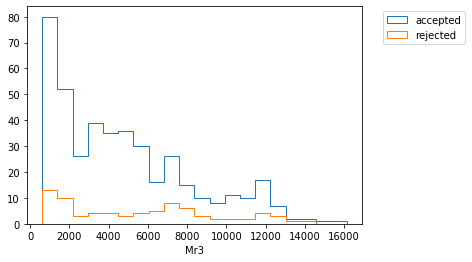

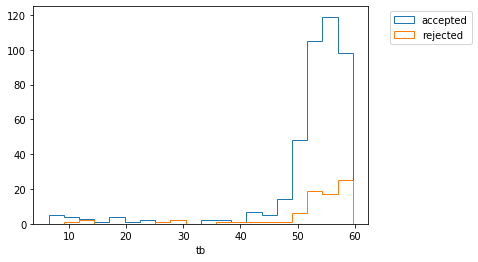

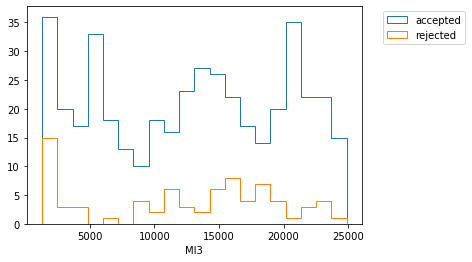

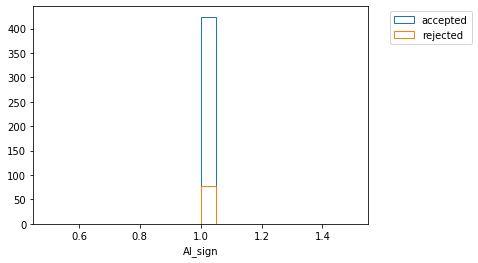

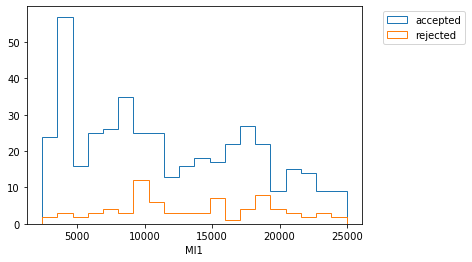

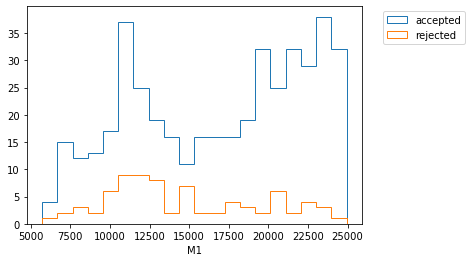

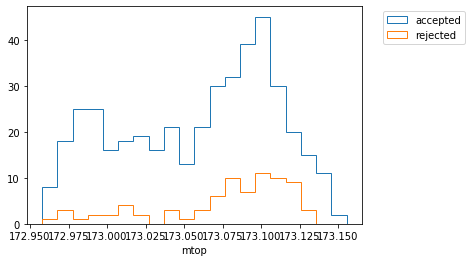

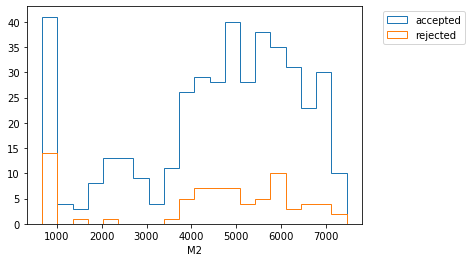

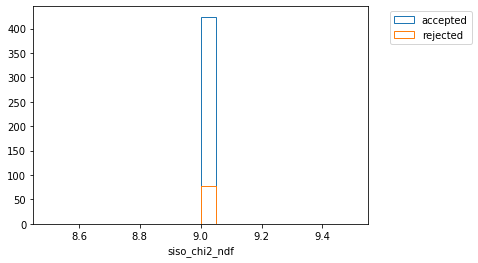

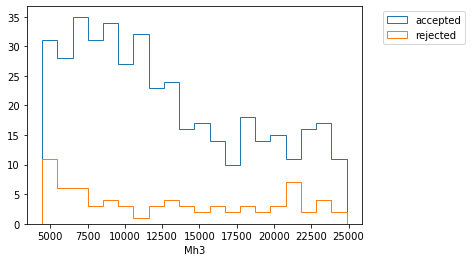

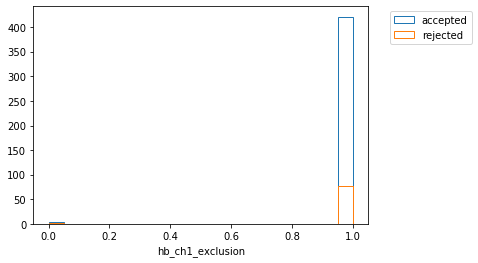

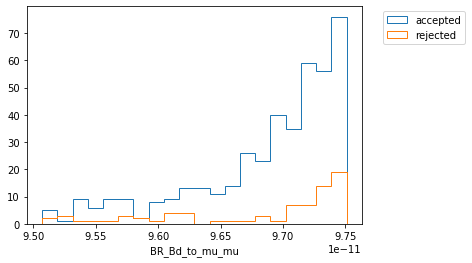

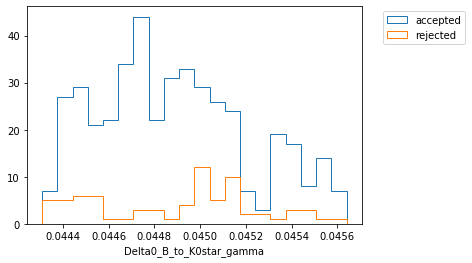

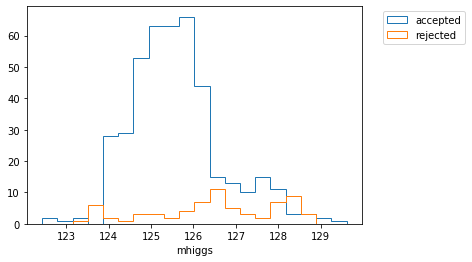

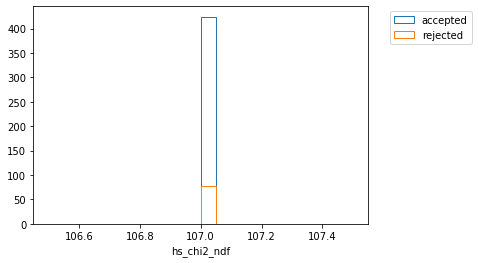

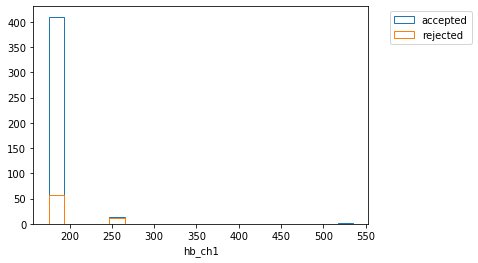

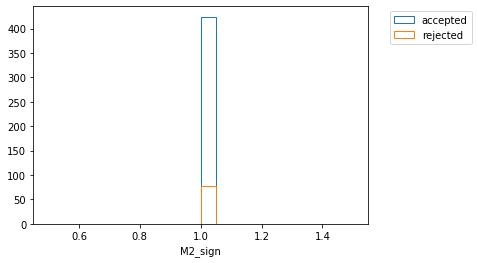

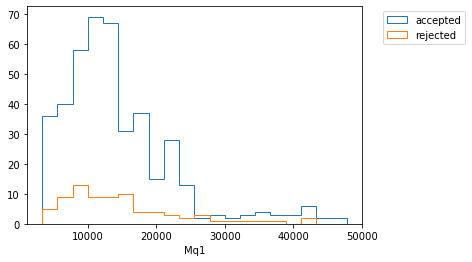

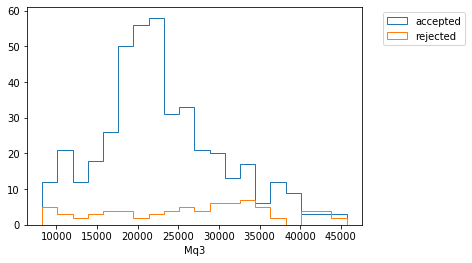

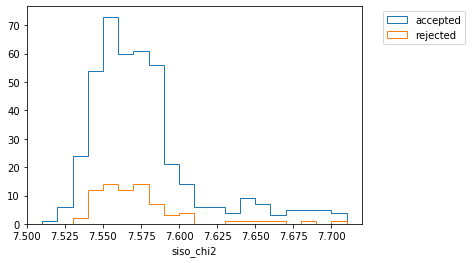

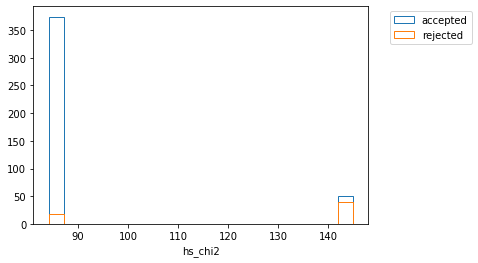

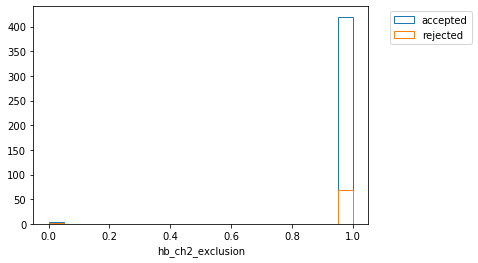

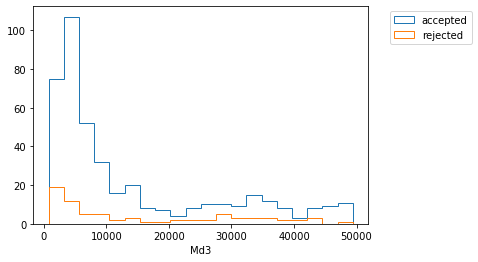

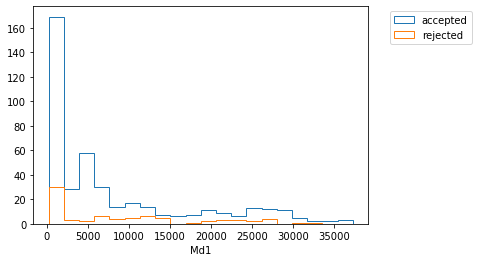

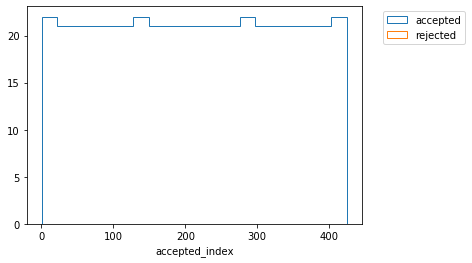

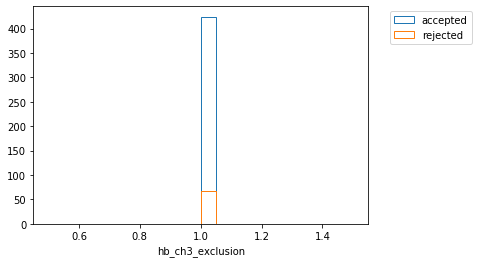

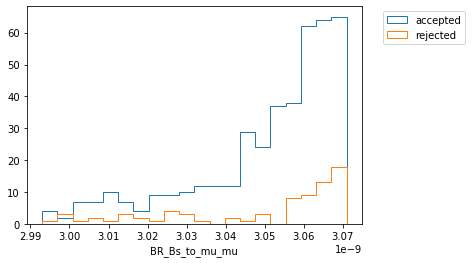

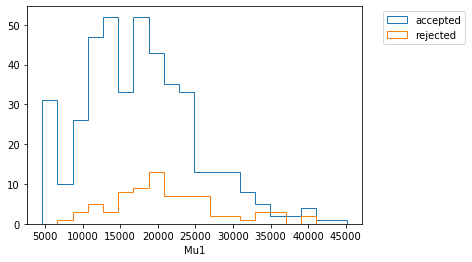

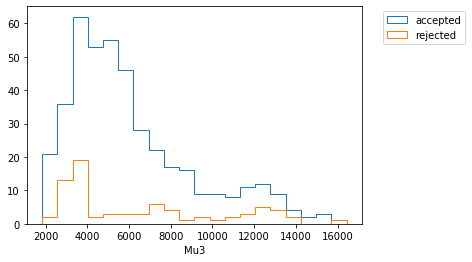

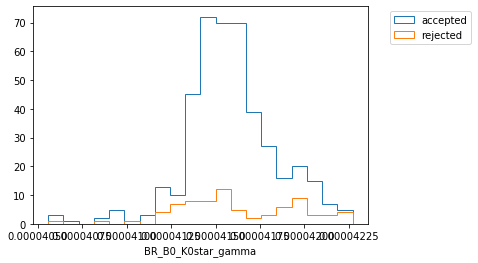

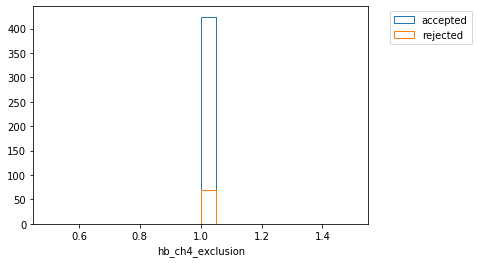

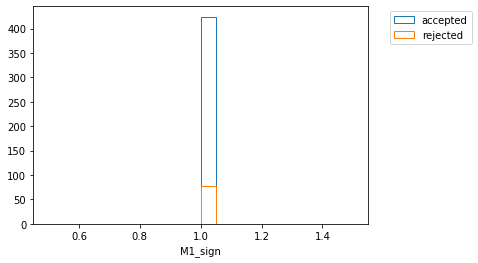

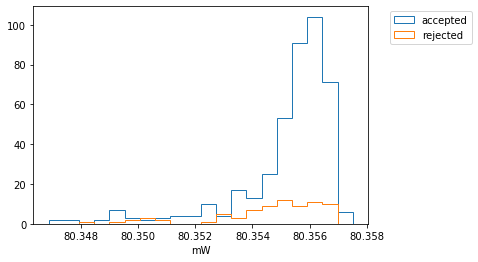

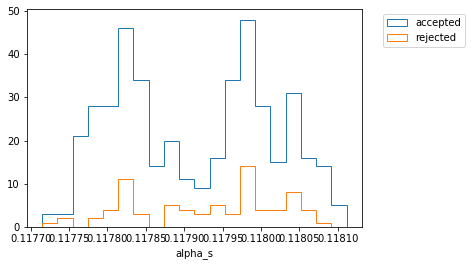

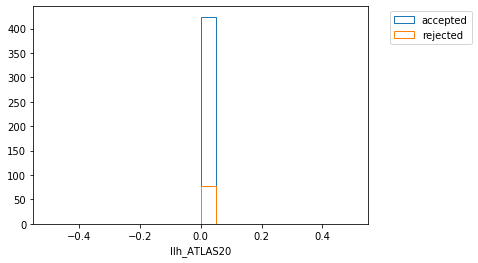

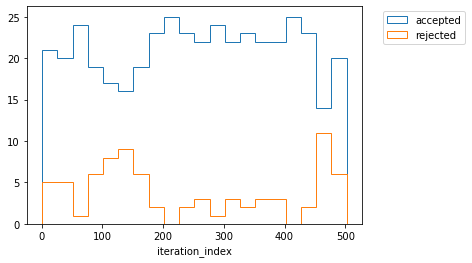

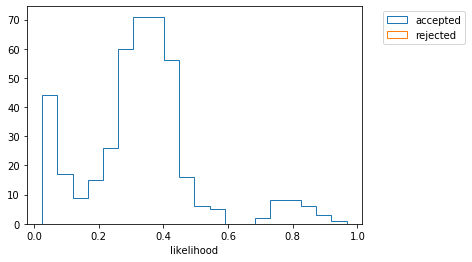

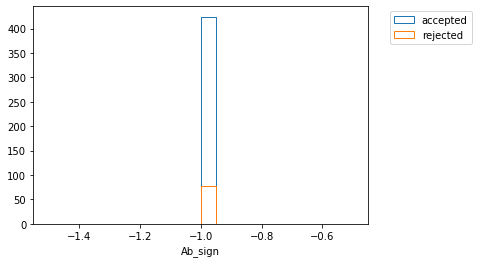

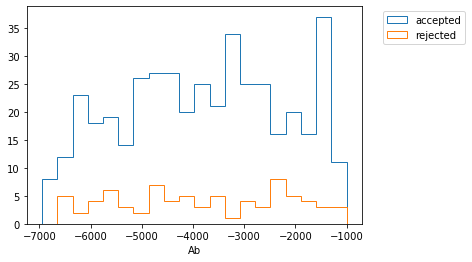

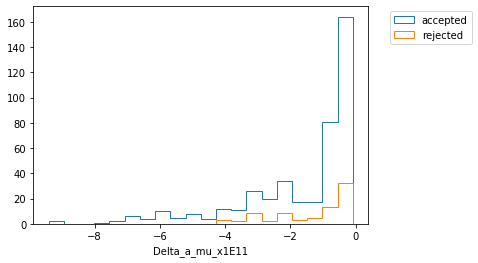

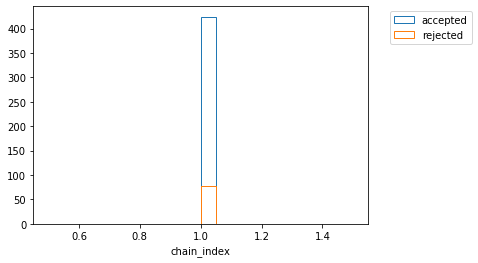

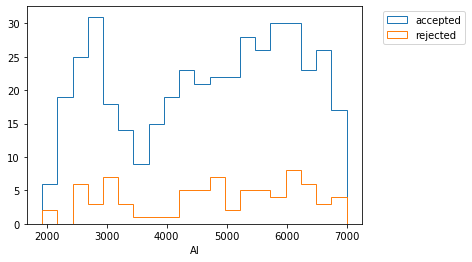

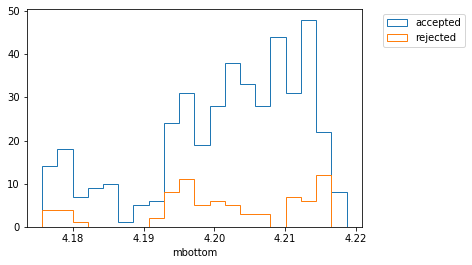

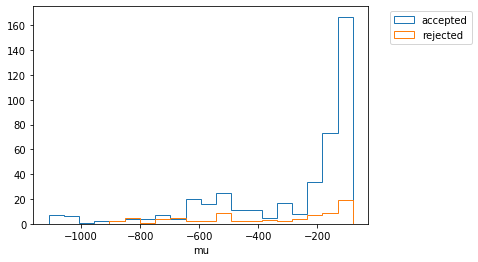

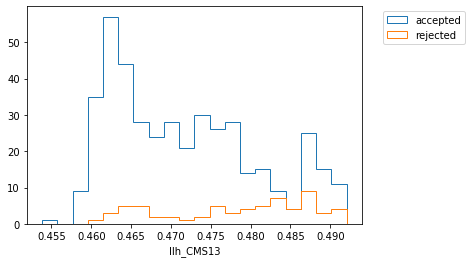

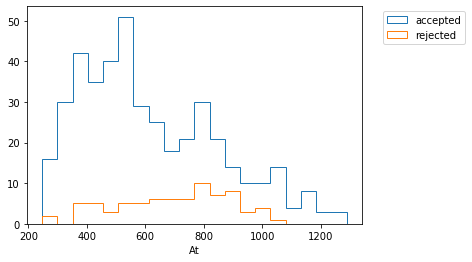

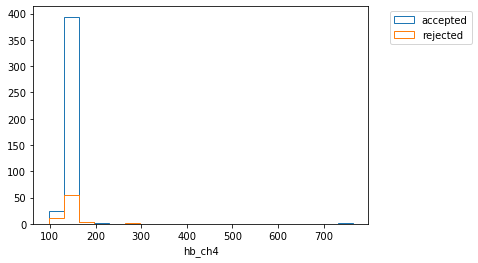

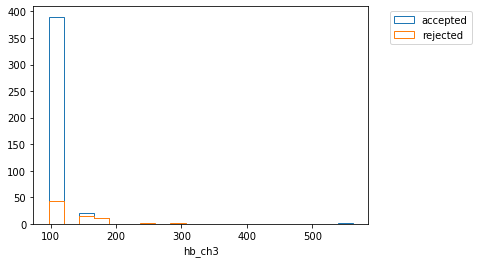

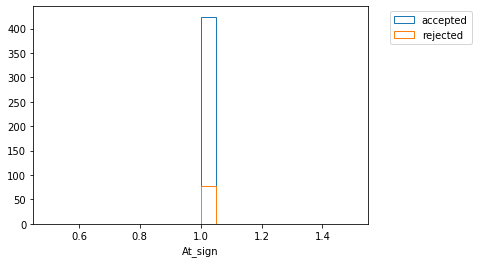

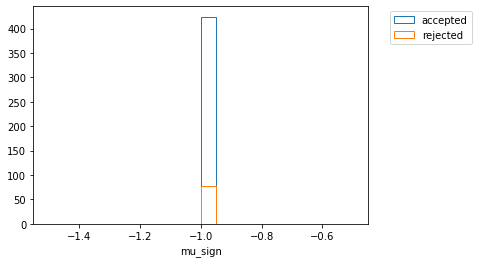

In [8]:
for v in df.columns:
    blah,bins,blah = plt.hist(accepted_df[v],bins=20,histtype='step')
    plt.hist(failed_df[v],bins=bins,histtype='step')
    plt.legend(['accepted','rejected'],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(v)
    plt.show()

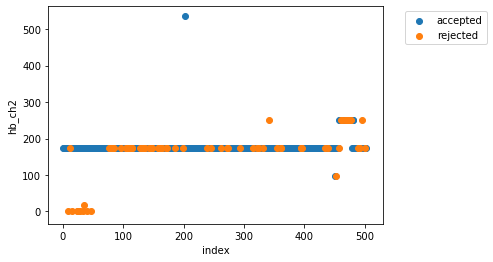

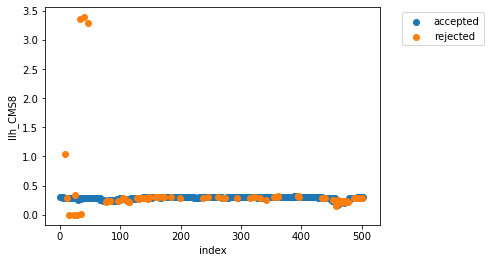

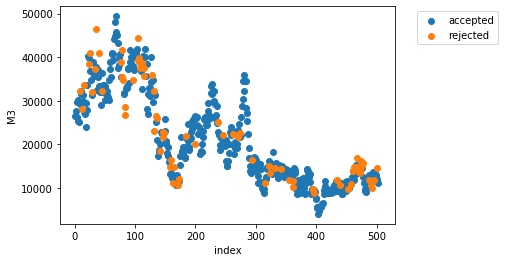

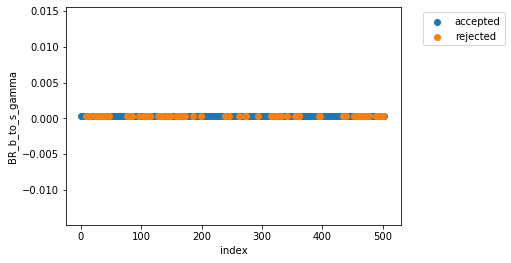

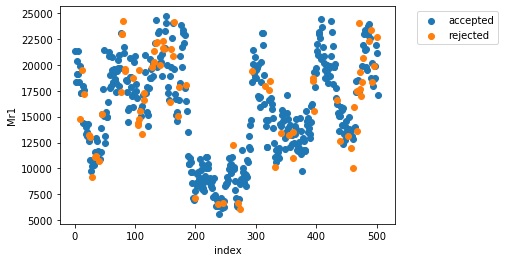

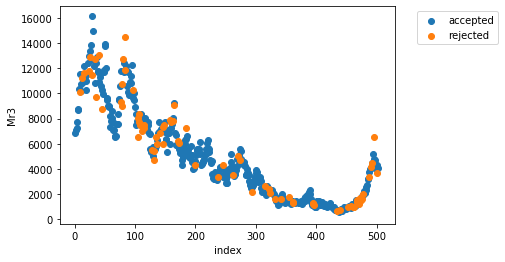

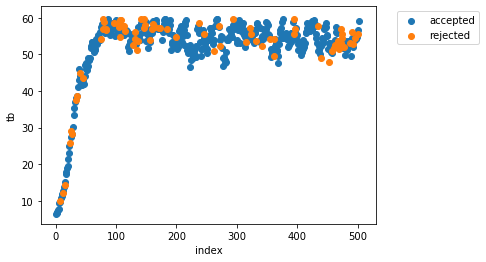

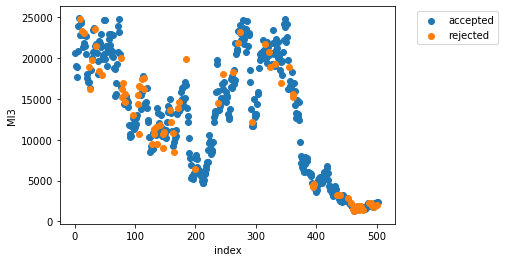

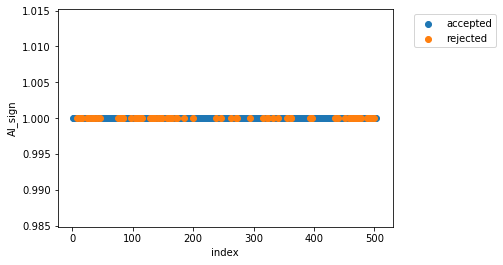

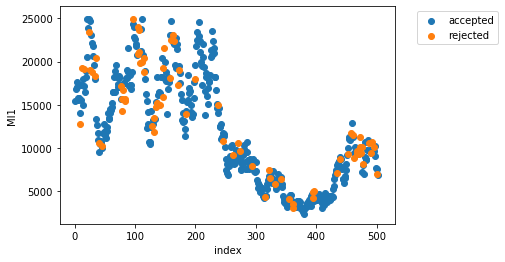

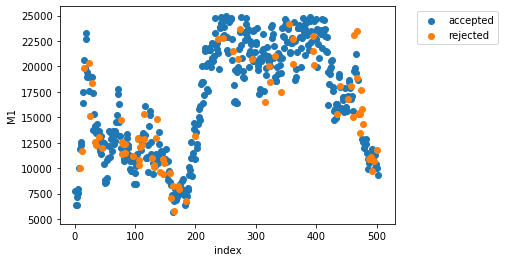

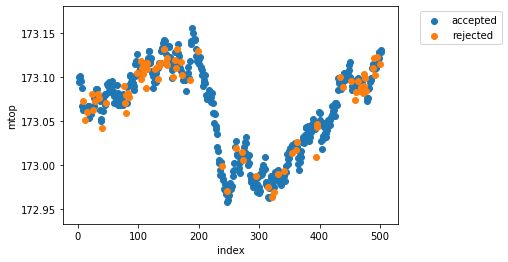

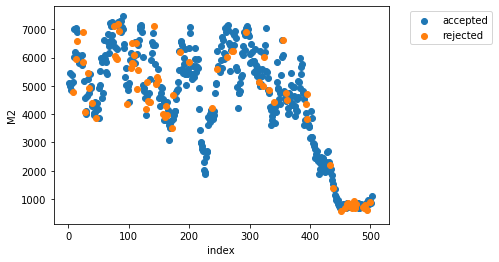

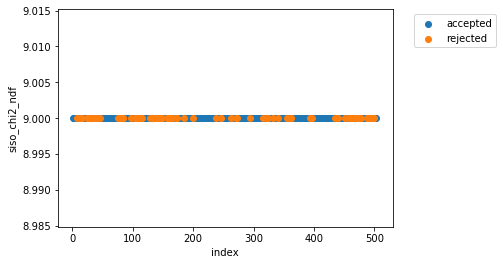

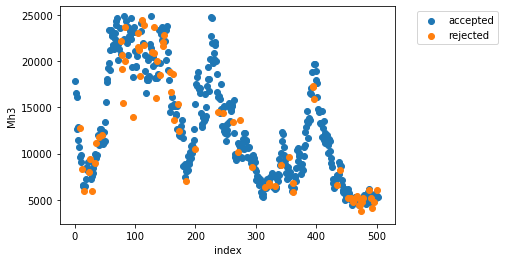

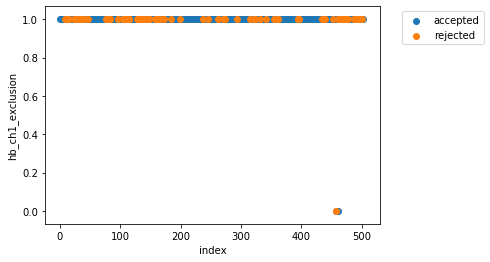

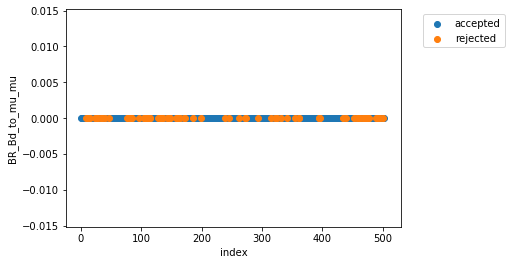

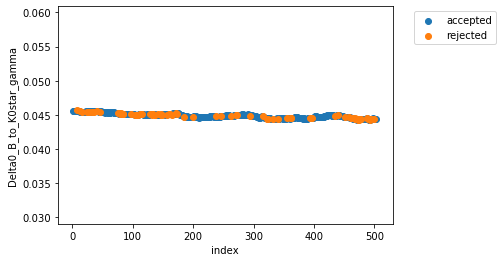

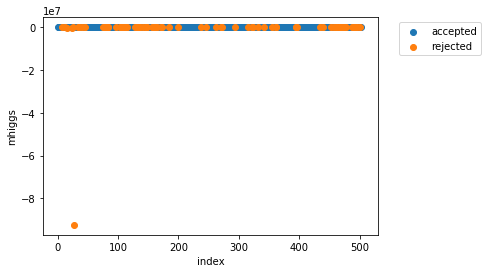

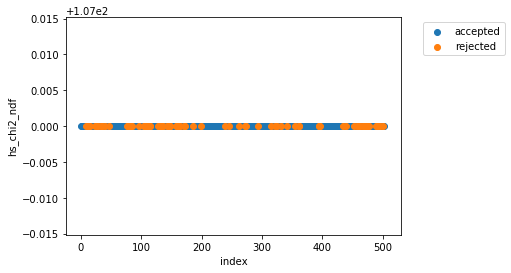

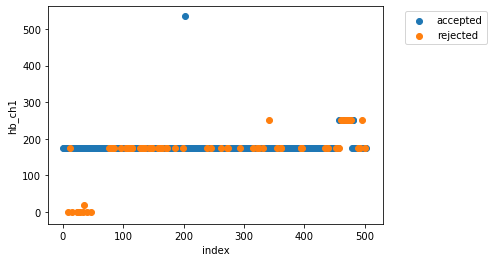

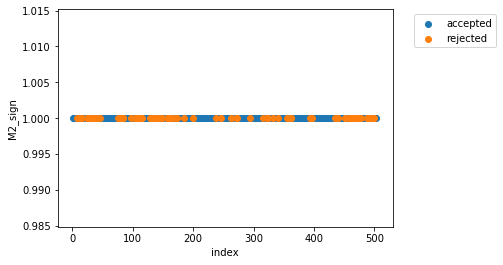

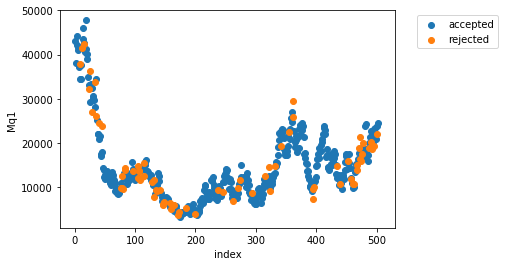

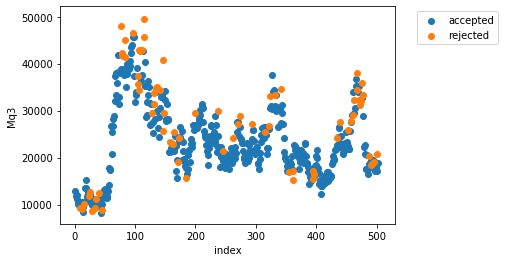

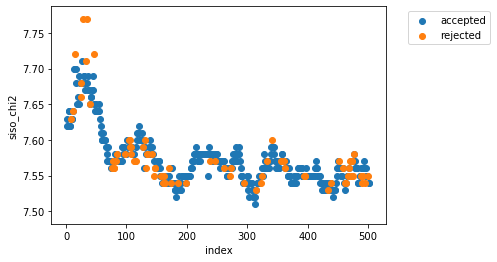

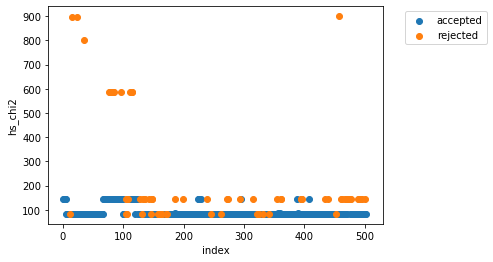

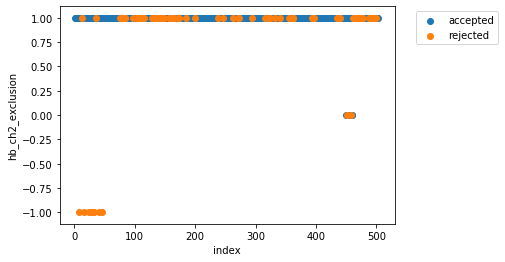

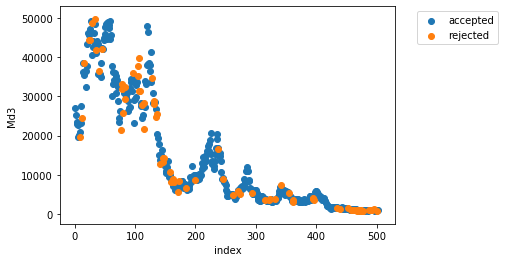

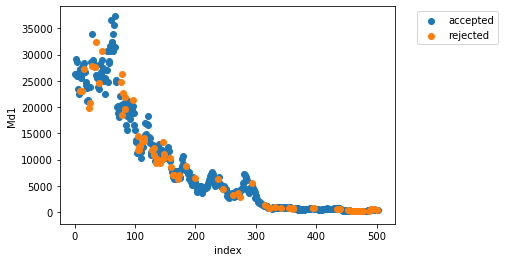

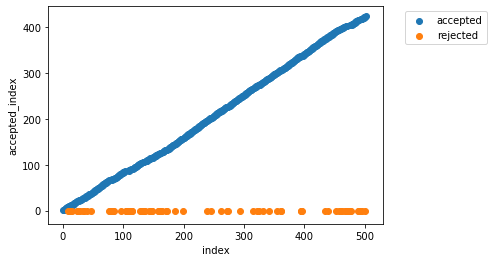

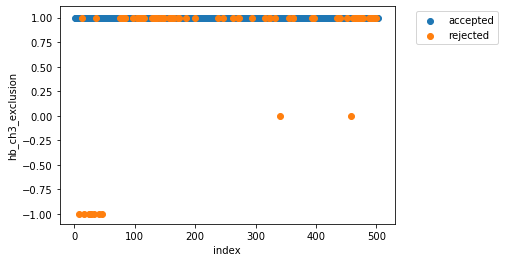

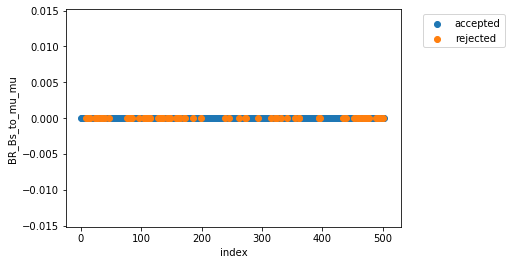

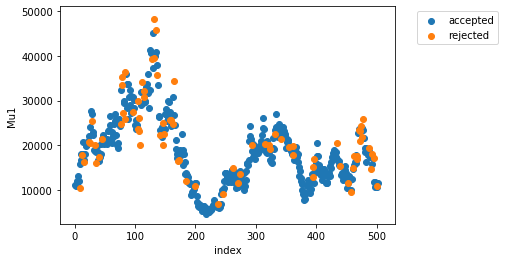

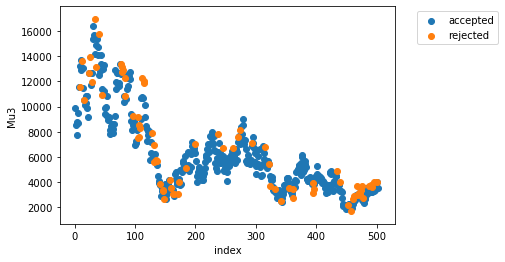

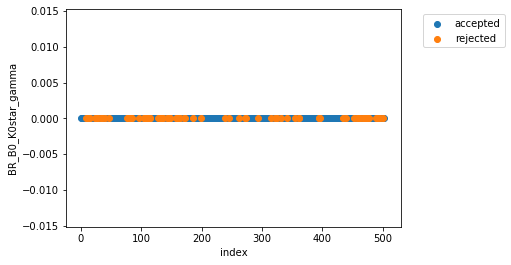

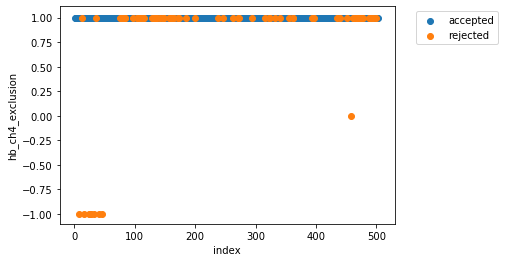

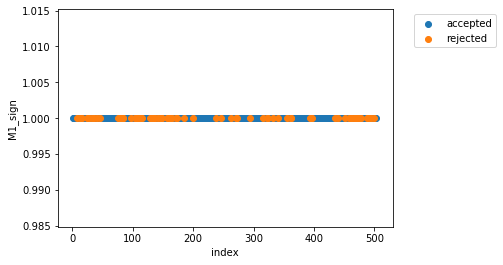

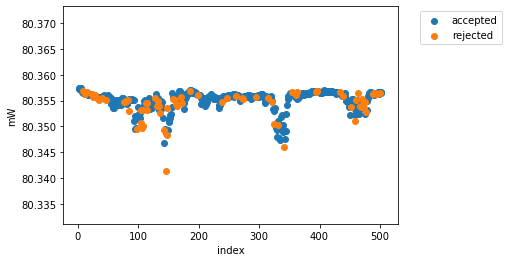

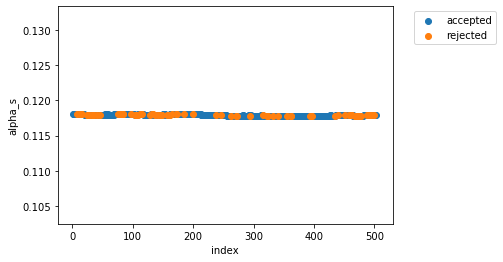

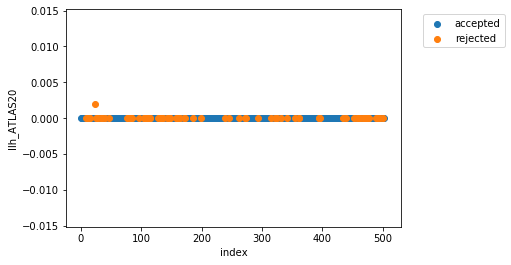

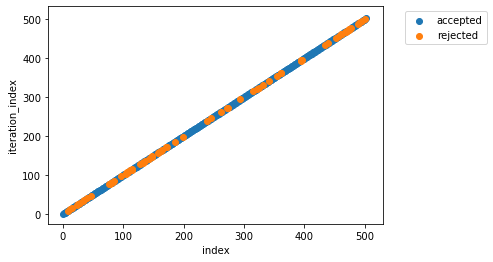

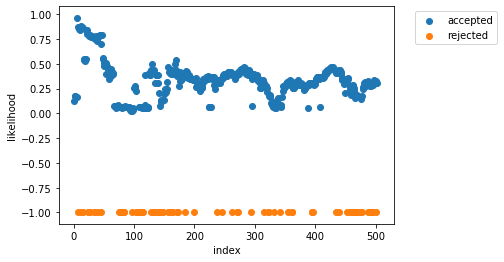

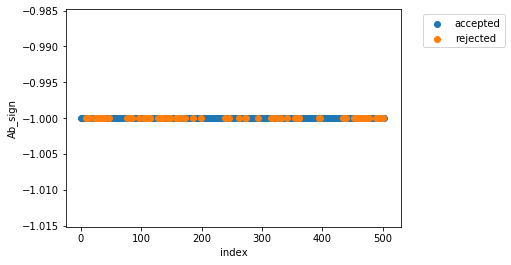

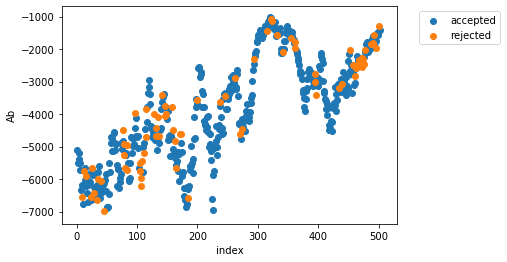

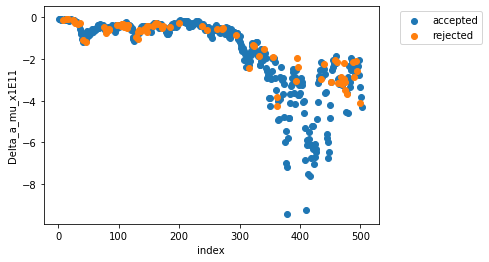

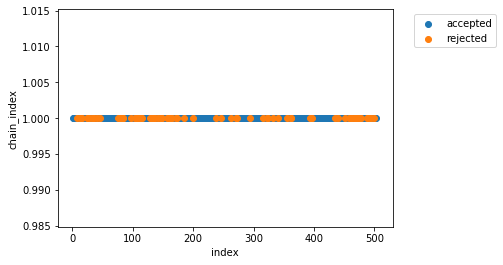

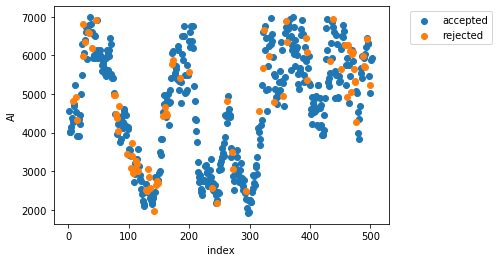

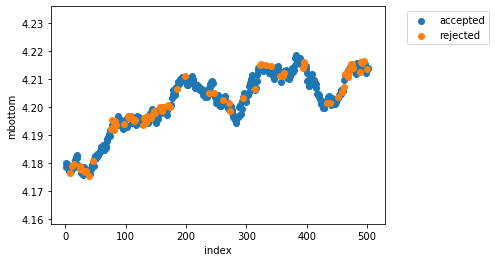

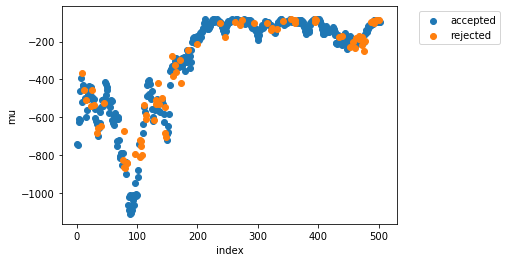

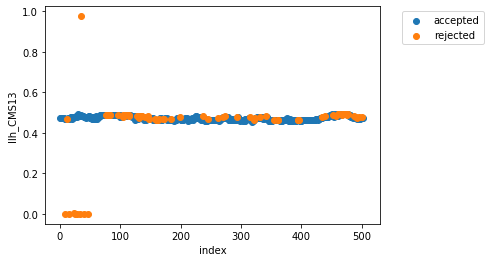

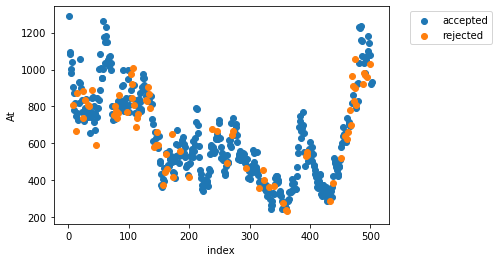

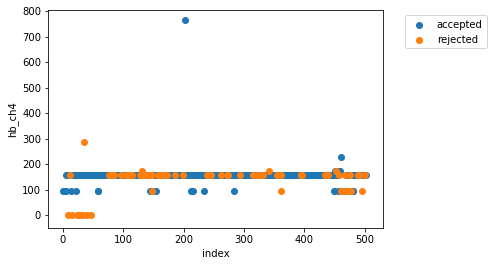

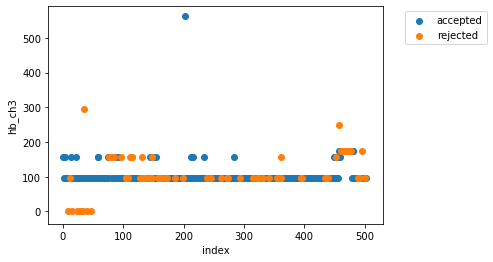

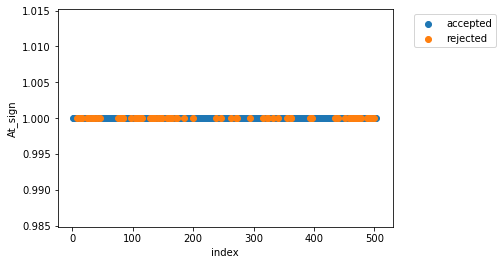

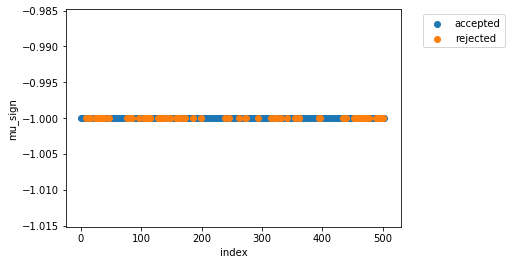

In [9]:
for v in df.columns:
    plt.scatter(accepted_df['iteration_index'],accepted_df[v])
    plt.scatter(failed_df['iteration_index'],failed_df[v])
    plt.xlabel('index')
    plt.ylabel(v)
    plt.legend(['accepted','rejected'],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

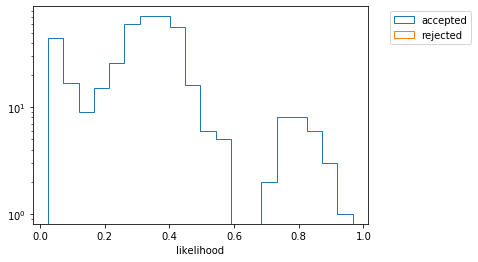

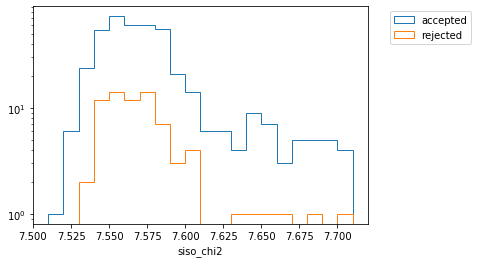

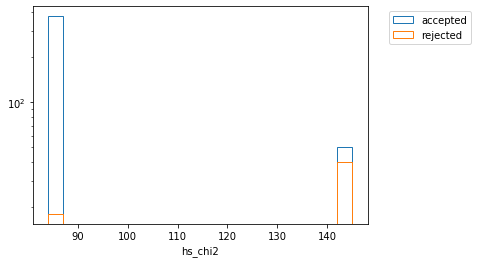

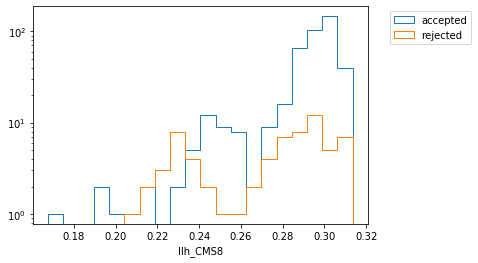

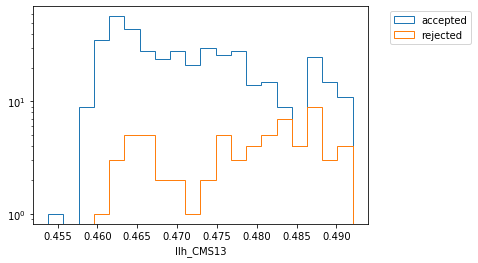

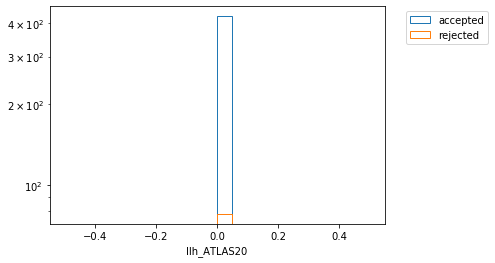

In [13]:
likelihood_contributions = ['likelihood', # total
                            'siso_chi2', # superiso
                            'hs_chi2', # HiggsSignals
                            'llh_CMS8','llh_CMS13','llh_ATLAS20' # HiggsBounds
                           ]

for v in likelihood_contributions:
    blah,bins,blah = plt.hist(accepted_df[v],bins=20,histtype='step')
    plt.hist(failed_df[v],bins=bins,histtype='step')
    plt.legend(['accepted','rejected'],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yscale('log')
    plt.xlabel(v)
    plt.show()

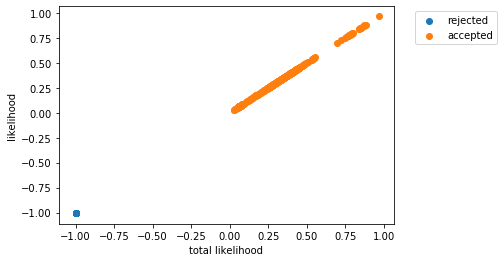

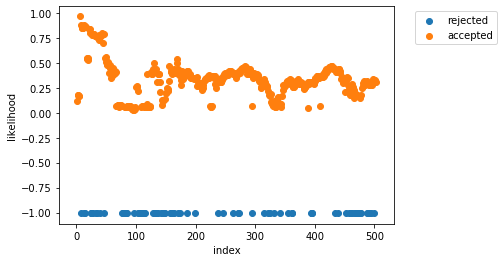

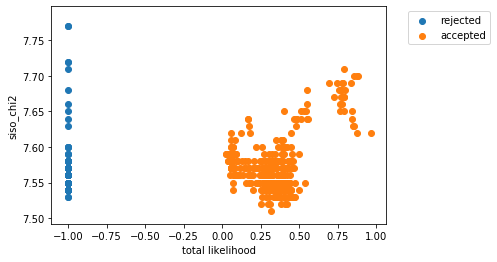

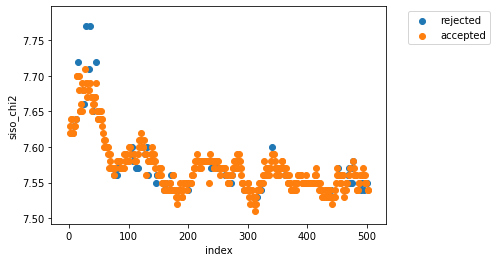

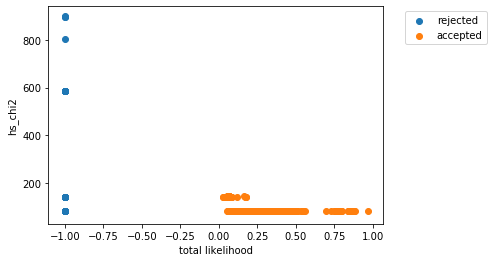

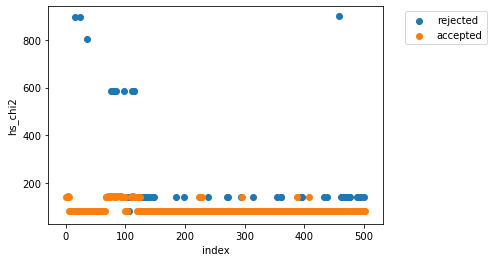

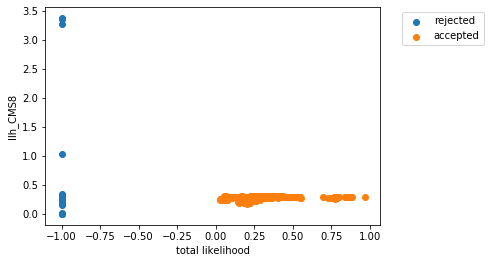

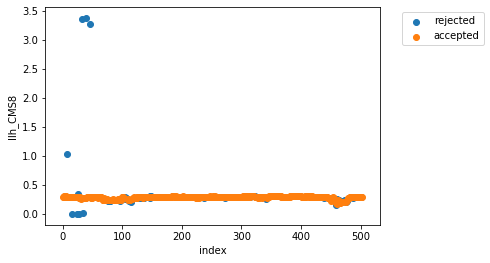

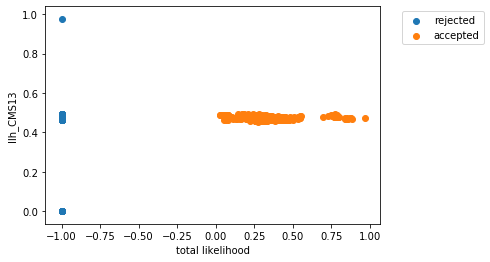

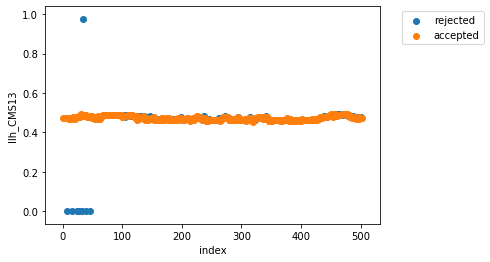

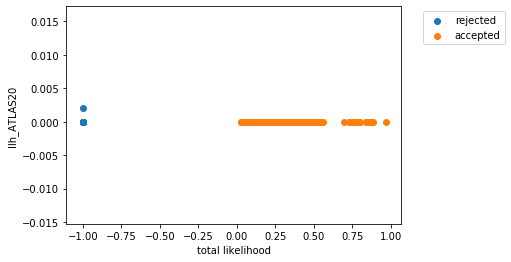

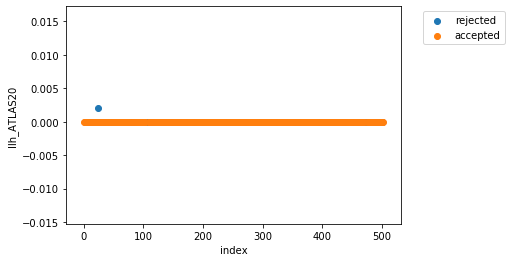

In [12]:
likelihood_contributions = ['likelihood', # total
                            'siso_chi2', # superiso
                            'hs_chi2', # HiggsSignals
                            'llh_CMS8','llh_CMS13','llh_ATLAS20' # HiggsBounds
                           ]

for v in likelihood_contributions:
    plt.scatter(failed_df['likelihood'],failed_df[v])
    plt.scatter(accepted_df['likelihood'],accepted_df[v])
    plt.xlabel('total likelihood')
    plt.ylabel(v)
    plt.legend(['rejected','accepted'],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    plt.scatter(failed_df['iteration_index'],failed_df[v])
    plt.scatter(accepted_df['iteration_index'],accepted_df[v])
    plt.xlabel('index')
    plt.ylabel(v)
    plt.legend(['rejected','accepted'],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()